In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
ds = pd.read_excel('PM_DATA.xlsx')
ds

,date,valid_time,latitude,longitude,pm1,pm2p5,pm10
0,2024-01-01,2024-01-01 10:30:00,6.6,-1.65,5.436880e-08,8.028631e-08,1.020810e-07
1,2024-01-02,2024-01-02 10:30:00,6.6,-1.65,5.121619e-08,7.627704e-08,9.646201e-08
2,2024-01-03,2024-01-03 10:30:00,6.6,-1.65,4.160948e-08,6.169569e-08,7.832008e-08
3,2024-01-04,2024-01-04 10:30:00,6.6,-1.65,4.530449e-08,6.473303e-08,8.361789e-08
4,2024-01-05,2024-01-05 10:30:00,6.6,-1.65,3.017769e-08,4.251348e-08,5.516741e-08
...,...,...,...,...,...,...,...
361,2024-12-27,2024-12-27 10:30:00,6.6,-1.65,6.870148e-08,8.742597e-08,1.173846e-07
362,2024-12-28,2024-12-28 10:30:00,6.6,-1.65,7.871372e-08,9.740137e-08,1.320401e-07
363,2024-12-29,2024-12-29 10:30:00,6.6,-1.65,6.746082e-08,8.399583e-08,1.136303e-07
364,2024-12-30,2024-12-30 10:30:00,6.6,-1.65,4.458469e-08,6.057474e-08,7.867543e-08


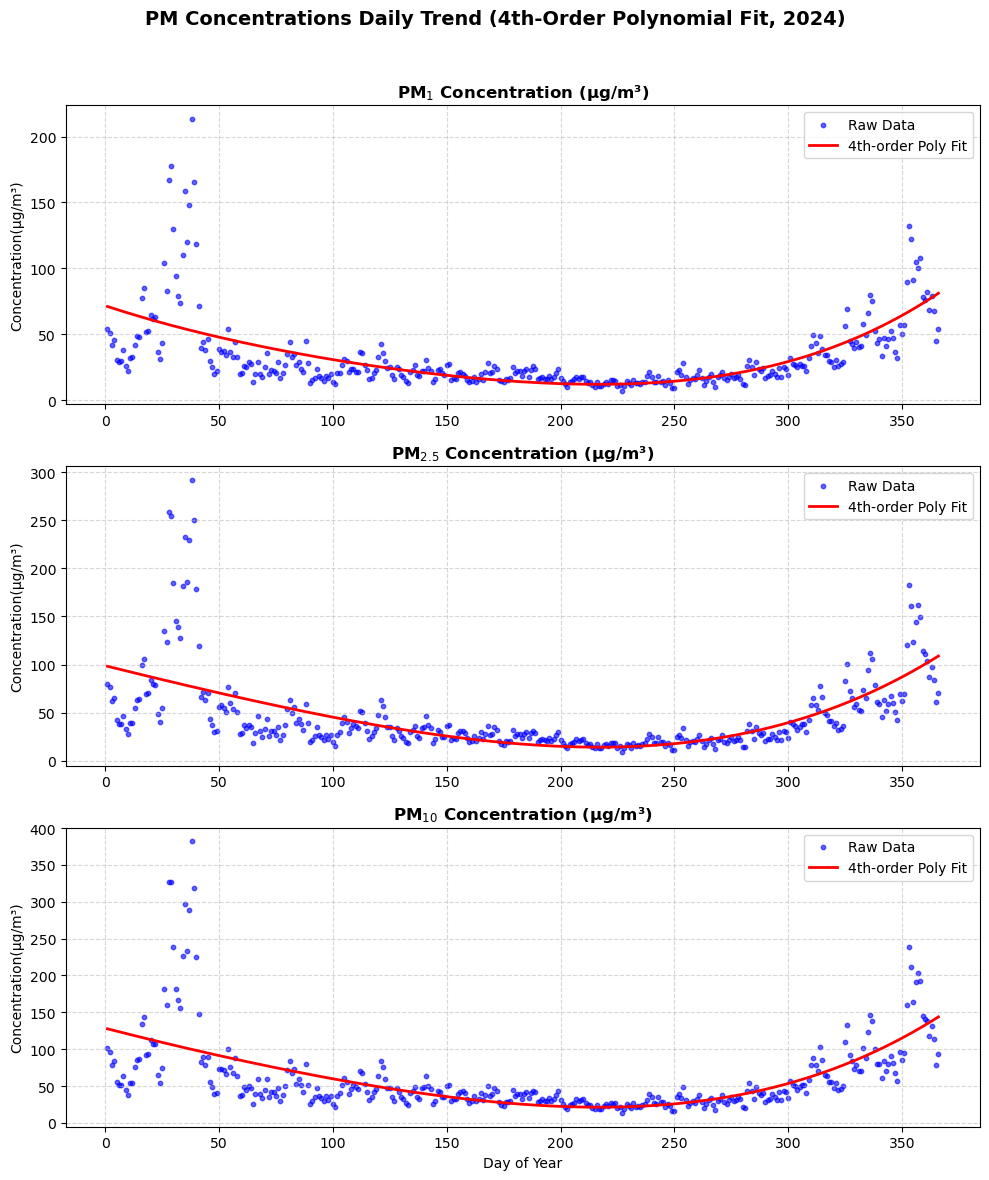

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
ds = pd.read_excel("PM_DATA.xlsx")

# Convert date to day of year
ds['day_of_year'] = pd.to_datetime(ds['date']).dt.dayofyear

# Convert from scientific notation to µg/m³ (assuming already µg/m³ but very small)
# If they are in g/m³, multiply by 1e9 for µg/m³
ds['pm1'] = ds['pm1'] * 1e9
ds['pm2p5'] = ds['pm2p5'] * 1e9
ds['pm10'] = ds['pm10'] * 1e9

# Plot setup
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=False)
pollutants = ['pm1', 'pm2p5', 'pm10']
titles = ['PM$_1$ Concentration (µg/m³)', 'PM$_{2.5}$ Concentration (µg/m³)', 'PM$_{10}$ Concentration (µg/m³)']

for ax, pol, title in zip(axes, pollutants, titles):
    x = ds['day_of_year']
    y = ds[pol]
    
    # Scatter plot
    ax.scatter(x, y, color='blue', s=10, alpha=0.6, label='Raw Data')
    
    # Polynomial fit (4th order)
    coeffs = np.polyfit(x, y, 4)
    poly = np.poly1d(coeffs)
    ax.plot(x, poly(x), color='red', linewidth=2, label='4th-order Poly Fit')
    
    ax.set_title(title, fontsize=12,fontweight='bold')
    ax.set_ylabel("Concentration(µg/m³)")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

axes[-1].set_xlabel("Day of Year")
plt.suptitle("PM Concentrations Daily Trend (4th-Order Polynomial Fit, 2024)", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('plot.png')
plt.show()


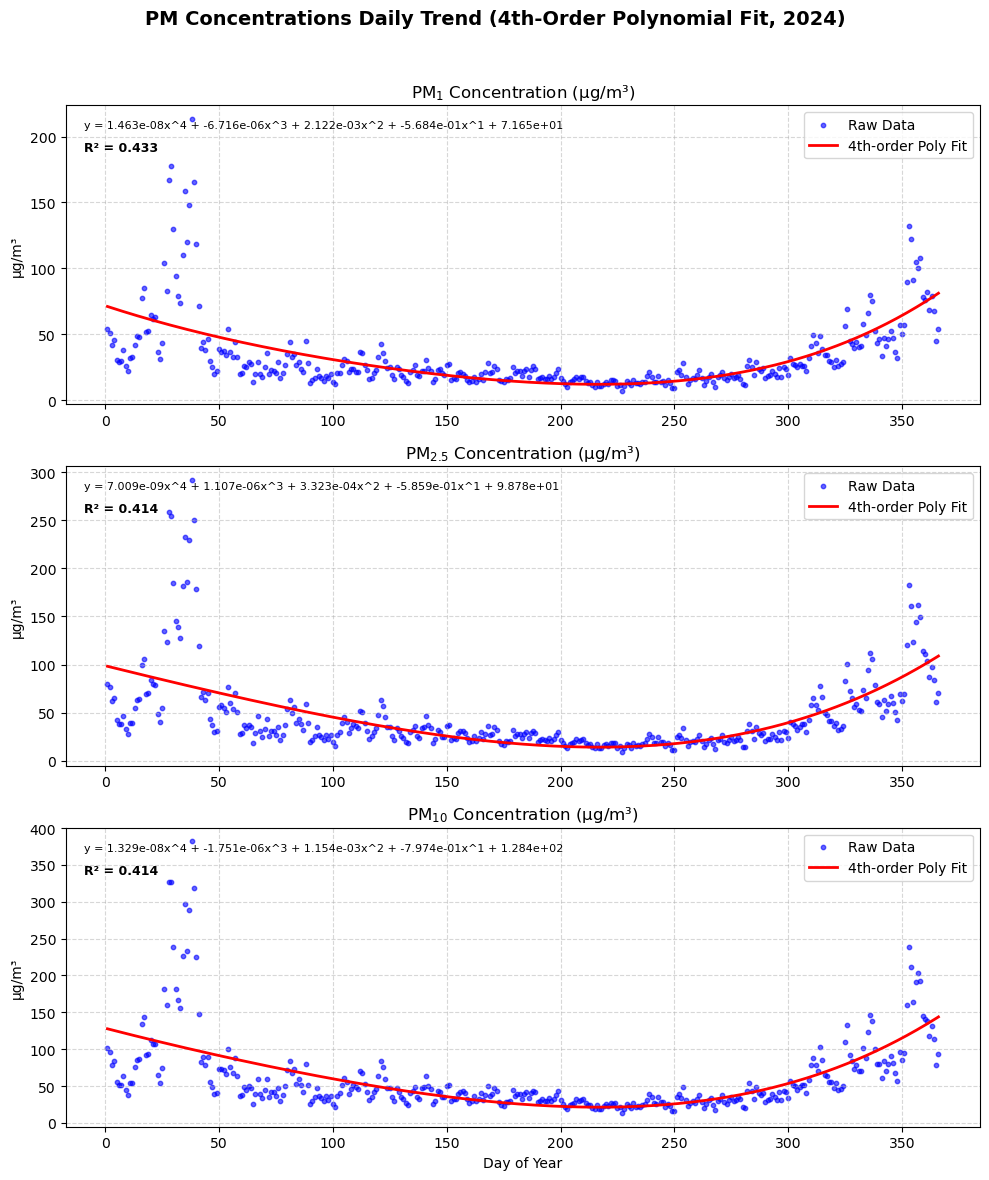

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
ds = pd.read_excel("PM_DATA.xlsx")

# Day of year
ds['day_of_year'] = pd.to_datetime(ds['date']).dt.dayofyear

# Convert kg/m³ → µg/m³
ds['pm1'] = ds['pm1'] * 1e9
ds['pm2p5'] = ds['pm2p5'] * 1e9
ds['pm10'] = ds['pm10'] * 1e9

# Plot setup
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=False)
pollutants = ['pm1', 'pm2p5', 'pm10']
titles = ['PM$_1$ Concentration (µg/m³)', 
          'PM$_{2.5}$ Concentration (µg/m³)', 
          'PM$_{10}$ Concentration (µg/m³)']

for ax, pol, title in zip(axes, pollutants, titles):
    x = ds['day_of_year']
    y = ds[pol]
    
    # Scatter plot
    ax.scatter(x, y, color='blue', s=10, alpha=0.6, label='Raw Data')
    
    # Polynomial fit
    coeffs = np.polyfit(x, y, 4)
    poly = np.poly1d(coeffs)
    
    # Smooth curve
    x_smooth = np.linspace(1, 366, 500)
    y_smooth = poly(x_smooth)
    ax.plot(x_smooth, y_smooth, color='red', linewidth=2, label='4th-order Poly Fit')
    
    # Calculate R²
    y_pred = poly(x)
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    # Polynomial equation as string
    eqn = "y = " + " + ".join([f"{coef:.3e}x^{4-i}" for i, coef in enumerate(coeffs[:-1])])
    eqn += f" + {coeffs[-1]:.3e}"
    
    # Add text on plot
    ax.text(0.02, 0.95, eqn, transform=ax.transAxes, fontsize=8, verticalalignment='top')
    ax.text(0.02, 0.88, f"R² = {r2:.3f}", transform=ax.transAxes, fontsize=9, verticalalignment='top', fontweight='bold')
    
    ax.set_title(title, fontsize=12)
    ax.set_ylabel("µg/m³")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

axes[-1].set_xlabel("Day of Year")
plt.suptitle("PM Concentrations Daily Trend (4th-Order Polynomial Fit, 2024)", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('image.png')
plt.show()


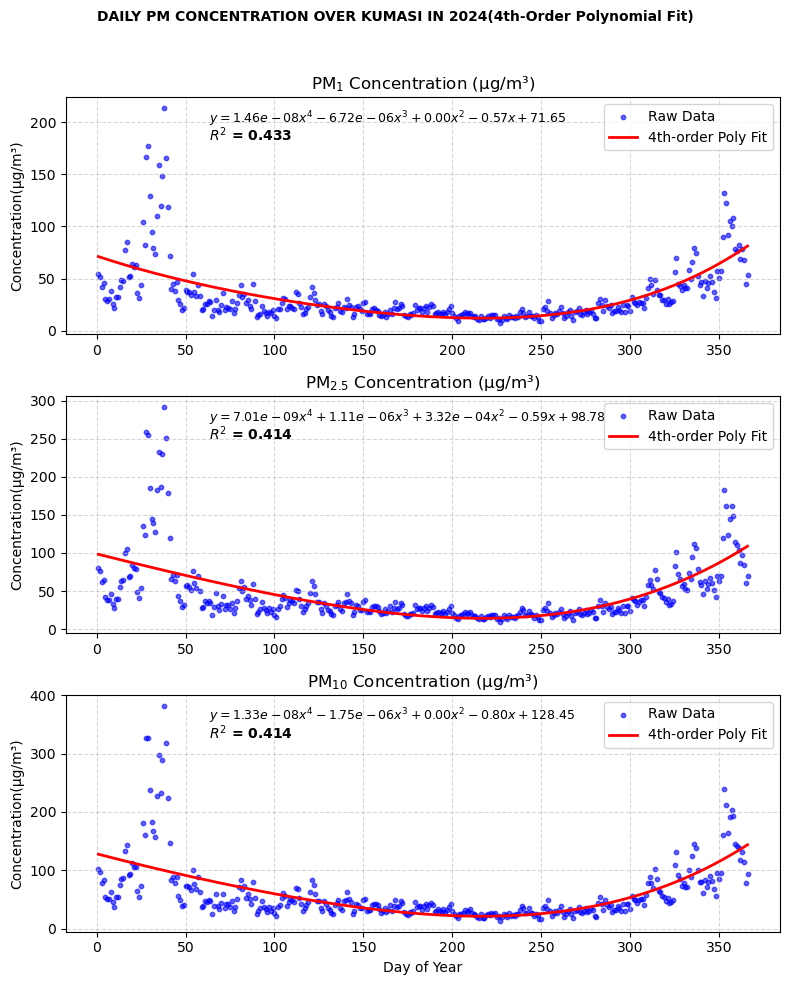

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
ds = pd.read_excel("PM_DATA.xlsx")

# Day of year
ds['day_of_year'] = pd.to_datetime(ds['date']).dt.dayofyear

# Convert kg/m³ → µg/m³
ds['pm1'] = ds['pm1'] * 1e9
ds['pm2p5'] = ds['pm2p5'] * 1e9
ds['pm10'] = ds['pm10'] * 1e9

# Function to format equation in LaTeX
def poly_to_latex(coeffs):
    eq = r"$y = "
    degree = len(coeffs) - 1
    for i, coef in enumerate(coeffs):
        power = degree - i
        if abs(coef) < 1e-3 or abs(coef) > 1e3:
            coef_str = f"{coef:.2e}"  # scientific notation
        else:
            coef_str = f"{coef:.2f}"  # normal number
        sign = " + " if coef >= 0 and i > 0 else ""
        if power == 0:
            eq += f"{sign}{coef_str}"
        elif power == 1:
            eq += f"{sign}{coef_str}x"
        else:
            eq += f"{sign}{coef_str}x^{power}"
    eq += r"$"
    return eq

# Plot setup
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=False)
pollutants = ['pm1', 'pm2p5', 'pm10']
titles = ['PM$_1$ Concentration (µg/m³)', 
          'PM$_{2.5}$ Concentration (µg/m³)', 
          'PM$_{10}$ Concentration (µg/m³)']

for ax, pol, title in zip(axes, pollutants, titles):
    x = ds['day_of_year']
    y = ds[pol]
    
    # Scatter plot
    ax.scatter(x, y, color='blue', s=10, alpha=0.6, label='Raw Data')
    
    # Polynomial fit
    coeffs = np.polyfit(x, y, 4)
    poly = np.poly1d(coeffs)
    
    # Smooth curve
    x_smooth = np.linspace(1, 366, 500)
    y_smooth = poly(x_smooth)
    ax.plot(x_smooth, y_smooth, color='red', linewidth=2, label='4th-order Poly Fit')
    
    # R²
    y_pred = poly(x)
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    # Add equation & R²
    ax.text(0.20, 0.95, poly_to_latex(coeffs), transform=ax.transAxes,
            fontsize=9, verticalalignment='top')
    ax.text(0.20, 0.88, fr"$R^2$ = {r2:.3f}", transform=ax.transAxes,
            fontsize=10, verticalalignment='top', fontweight='bold')
    
    ax.set_title(title, fontsize=12)
    ax.set_ylabel("Concentration(µg/m³)")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

axes[-1].set_xlabel("Day of Year")
plt.suptitle("DAILY PM CONCENTRATION OVER KUMASI IN 2024(4th-Order Polynomial Fit)", 
             fontsize=10, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('plot.png')
plt.show()
